# Recommender Project

## 1. Data Prep

In [1]:
# import the restaurant ratings data (first tab of spreadsheet)
import pandas as pd

xls = pd.ExcelFile('../Data/Restaurant_Ratings.xlsx')
print(xls.sheet_names)

['restaurant_ratings', 'restaurant_details']


In [2]:
restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx', sheet_name = 0)
restaurant_ratings.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [3]:
restaurant_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Consumer_ID      1161 non-null   object
 1   Restaurant_ID    1161 non-null   int64 
 2   Restaurant_Name  1161 non-null   object
 3   Overall_Rating   1161 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 36.4+ KB


In [4]:
# view the range of the ratings
restaurant_ratings.describe()

,Restaurant_ID,Overall_Rating
count,1161.000000,1161.000000
mean,134192.041344,1.199828
std,1100.916275,0.773282
min,132560.000000,0.000000
25%,132856.000000,1.000000
50%,135030.000000,1.000000
75%,135059.000000,2.000000
max,135109.000000,2.000000


In [5]:
# pivot the data to get it into a user-item matrix format (think about how you'd like to deal with the NaN values)
X = (restaurant_ratings.pivot(index = 'Consumer_ID', columns = 'Restaurant_Name', values = 'Overall_Rating')).fillna(restaurant_ratings.Overall_Rating.mean())
X.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [6]:
# check the number of rows and columns in the data
X.shape

(138, 127)

## 2. Collaborative Filtering: Recommend Restaurants to a New User

### a. Fit an initial TruncatedSVD model with all the components on centered data

In [7]:
# center the data
X_centered = X - X.mean()
X_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-1.234655,0.021733,0.034765,0.02026
U1002,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.234655,0.021733,0.034765,0.02026
U1003,0.060855,0.004344,0.775518,0.013038,0.02172,0.772629,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1004,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,0.779875,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1005,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [8]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD

svd127 = TruncatedSVD(n_components = 127)
U127 = svd127.fit_transform(X_centered)
U127_df = pd.DataFrame(U127, index = X_centered.index)
U127_df.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,-0.238987,-0.004732,-0.244226,-0.223318,0.387806,0.198918,0.055889,-0.672026,-0.123746,0.366807,...,-0.002682,0.044865,-0.031612,-0.012164,-0.022619,0.031714,0.002626,0.023897,0.005131,-0.001076
U1002,0.347358,0.024012,-0.011130,-0.134108,0.224169,-0.099427,-0.020287,0.092353,-0.025184,-0.174413,...,0.009931,-0.045685,0.011798,-0.019839,0.025925,-0.011349,-0.000738,-0.006433,-0.007813,0.000236
U1003,0.293837,-0.468495,1.377970,0.387374,0.999305,0.293275,0.028629,-0.965113,-0.277189,0.655714,...,0.001804,-0.004534,0.005459,0.005589,0.009876,0.019904,0.000786,0.003100,-0.004856,0.000306
U1004,0.630330,0.132805,-0.634468,-0.014701,0.124573,-0.020247,0.091441,-0.013164,-0.149599,0.632991,...,-0.006321,0.004020,0.012769,0.022331,-0.000732,-0.011119,-0.000655,-0.006691,-0.002589,0.000431
U1005,0.355531,0.298323,-0.038962,-0.145842,-0.034525,0.116069,0.094693,0.523970,0.009277,0.688180,...,0.000830,0.010911,-0.015252,-0.040849,0.030631,-0.005658,-0.000265,-0.003136,-0.002396,0.000198


In [9]:
# view the cumulative explained variance ratios
import numpy as np

np.cumsum(svd127.explained_variance_ratio_.round(2))

array([0.1 , 0.15, 0.19, 0.23, 0.26, 0.29, 0.32, 0.35, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95])

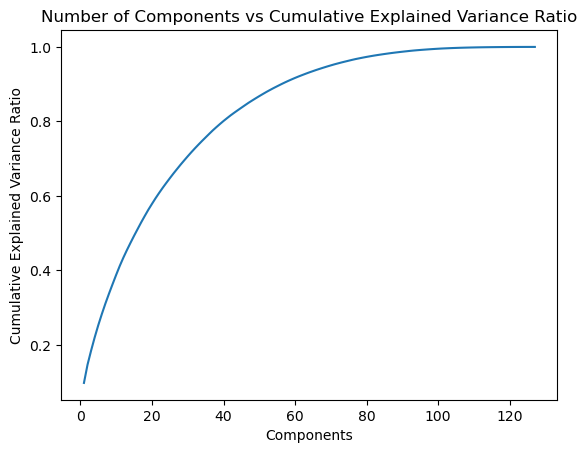

In [10]:
# plot the cumulative explained variance ratios
cum_evr127 = list(zip(range(1, U127.shape[1] + 1), np.cumsum(svd127.explained_variance_ratio_)))
cum_evr127_df = pd.DataFrame(cum_evr127).set_index(0)
cum_evr127_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

### b. Update the model to have 50 components

In [11]:
# fit a TruncatedSVD model with 50 components
svd50 = TruncatedSVD(n_components = 50)
U50 = svd50.fit_transform(X_centered)
U50_df = pd.DataFrame(U50, index = X_centered.index)
U50_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,-0.238987,-0.004732,-0.244226,-0.223319,0.387806,0.198918,0.055889,-0.672027,-0.123745,0.366806,...,0.022494,-0.175506,0.111300,0.077870,0.053064,0.009613,-0.107997,-0.081006,0.051227,-0.062563
U1002,0.347358,0.024012,-0.011130,-0.134108,0.224169,-0.099428,-0.020287,0.092350,-0.025182,-0.174412,...,-0.280678,-0.238117,-0.130458,0.175185,0.088331,0.062670,-0.120937,0.006877,-0.020779,0.024600
U1003,0.293837,-0.468495,1.377969,0.387374,0.999305,0.293276,0.028628,-0.965110,-0.277190,0.655716,...,0.098509,0.407804,-0.423046,-0.169055,0.194745,-0.135574,0.212556,0.060374,0.042301,-0.036737
U1004,0.630330,0.132805,-0.634468,-0.014700,0.124573,-0.020247,0.091442,-0.013163,-0.149600,0.632994,...,-0.212193,-0.027029,0.008163,-0.024772,0.128077,-0.101287,-0.335364,-0.051289,-0.072964,0.035887
U1005,0.355531,0.298323,-0.038962,-0.145842,-0.034524,0.116068,0.094693,0.523967,0.009278,0.688179,...,-0.096880,-0.163814,0.149231,-0.026825,0.126936,-0.075400,-0.229845,-0.079260,-0.131652,0.020944


In [12]:
# view the cumulative explained variance ratios
np.cumsum(svd50.explained_variance_ratio_.round(2))

array([0.1 , 0.15, 0.19, 0.23, 0.26, 0.29, 0.32, 0.35, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91])

### c. Introduce a New User

In [13]:
# here's a new user
import numpy as np
import pandas as pd

# create a user-item matrix
restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx')
X = restaurant_ratings.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').fillna(restaurant_ratings.Overall_Rating.mean())

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 2 ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# view only the restaurants that the new user rated
new_user_df.T.dropna()

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [15]:
# read in the restaurants details (second tab of spreadsheet)
restaurant_details = pd.read_excel('../Data/restaurant_ratings.xlsx', sheet_name=1)
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [16]:
# the new user likes low-priced american chain restaurants
restaurant_details[restaurant_details.Name.isin(new_user_df.T.dropna().index)]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


### d. Recommend Restaurants to the New User

In [17]:
# apply the necessary data prep steps to the user
# fill nan values with the mean rating
new_user_50_df = new_user_df.fillna(restaurant_ratings.Overall_Rating.mean())
# center the data
new_user_centered = new_user_50_df - X.mean()
new_user_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [18]:
new_user_df.describe()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
new_user_centered.describe()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
count,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
mean,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
25%,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
50%,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
75%,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
max,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [20]:
# transform the user into the latent space
U_new_user = svd50.transform(new_user_centered)
U_new_user_df = pd.DataFrame(U_new_user, index = new_user_centered.index)
U_new_user_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.021157,-0.049697,-0.085407,0.029617,-0.003825,0.028022,0.071138,-0.031723,-0.05516,-0.078405,...,-0.043294,0.071811,0.014487,0.017662,-0.049689,0.040139,0.008363,-0.012409,-0.08074,0.025847


In [21]:
# view the shape of the output
U_new_user_df.shape

(1, 50)

In [22]:
# reconstruct the user-item matrix for the user
new_user_pred = np.dot(U_new_user_df, svd50.components_)
new_user_pred[0][:5]

array([ 0.03569901,  0.00238453, -0.02001103,  0.00097092,  0.05252166])

In [23]:
# view the shape of the output
new_user_pred.shape

(1, 127)

In [24]:
# make restaurant recommendations for the new user
new_user_recs = pd.DataFrame(new_user_pred, columns=X.columns)
new_user_recs

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.035699,0.002385,-0.020011,0.000971,0.052522,0.007028,-0.04666,-0.005283,-0.006511,-0.000541,...,0.015988,0.005437,0.002006,-0.023207,0.021906,0.007482,-0.030242,-0.113353,0.020541,0.089597


In [25]:
# sort the recommendations
top_recs = new_user_recs.T.sort_values(by=0, ascending=False)
top_recs.columns = ['Predicted_Rating']
top_recs.reset_index(inplace=True)
top_recs.head()

,Restaurant_Name,Predicted_Rating
0,KFC,0.143708
1,Potzocalli,0.132840
2,McDonalds Centro,0.124811
3,Chilis Cuernavaca,0.119520
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.111808


In [26]:
# exclude the restaurants the user already rated
already_rated = new_user_df.T.dropna().index
already_rated

Index(['KFC', 'McDonalds Centro'], dtype='object', name='Restaurant_Name')

In [27]:
already_rated = new_user_df.T.dropna().index
already_rated

Index(['KFC', 'McDonalds Centro'], dtype='object', name='Restaurant_Name')

In [28]:
# view the new recommended restaurants
top_recs_final = top_recs[~top_recs.Restaurant_Name.isin(already_rated)]
top_recs_final.head(10)

,Restaurant_Name,Predicted_Rating
1,Potzocalli,0.132840
3,Chilis Cuernavaca,0.119520
4,Restaurant And Bar And Clothesline Carlos N Ch...,0.111808
5,Restaurant Teely,0.108849
6,Restaurante Y Pescaderia Tampico,0.107560
7,Mariscos Tia Licha,0.105291
8,Vips,0.089597
9,Sirlone,0.076010
10,El Lechon Potosino,0.060404
11,Chaires,0.055944


In [29]:
# view the restaurant details dataframe
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [30]:
# combine the predicted ratings and restaurant details dataframes
(top_recs_final.merge(restaurant_details, how='left', left_on='Restaurant_Name', right_on='Name')
               .drop(columns='Name')
               .head(10))

,Restaurant_Name,Predicted_Rating,Restaurant_ID,Cuisine,Price,Franchise
0,Potzocalli,0.132840,135108.0,NaN,Low,No
1,Chilis Cuernavaca,0.119520,134987.0,NaN,Medium,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.111808,134983.0,Bar,High,No
3,Restaurant Teely,0.108849,134992.0,NaN,High,No
4,Restaurante Y Pescaderia Tampico,0.107560,135054.0,Seafood,High,No
5,Mariscos Tia Licha,0.105291,132768.0,Family,Medium,Yes
6,Vips,0.089597,132951.0,American,Low,Yes
7,Sirlone,0.076010,132854.0,International,Medium,No
8,El Lechon Potosino,0.060404,132846.0,International,Low,No
9,Chaires,0.055944,132866.0,Bakery,Medium,No


In [31]:
# what are your thoughts on these recommendations?


## 3. Content-Based Filtering: Suggest Similar Restaurants to a Restaurant

### a. Prep the data to contain only numeric values

In [32]:
# turn the cuisine, price and franchise columns of the restaurant details data into numeric columns

# turn cuisine into dummy variables

# turn price into a numeric value

# turn franchise into an indicator


In [33]:
details = restaurant_details.copy()

In [34]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_ID  123 non-null    float64
 1   Name           127 non-null    object 
 2   Cuisine        90 non-null     object 
 3   Price          123 non-null    object 
 4   Franchise      123 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.1+ KB


In [35]:
details.Franchise.value_counts()

Franchise
No     96
Yes    27
Name: count, dtype: int64

In [36]:
details[details['Franchise'].isna()]

,Restaurant_ID,Name,Cuisine,Price,Franchise
13,NaN,Cenaduria El Rinc√≥n De Tlaquepaque,NaN,NaN,NaN
30,NaN,El Rinc√≥n De San Francisco,NaN,NaN,NaN
36,NaN,Gorditas Do√±a Tota,NaN,NaN,NaN
80,NaN,Restaurant Las Ma√±anitas,NaN,NaN,NaN


In [37]:
details.Franchise = details.Franchise.fillna('No')
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_ID  123 non-null    float64
 1   Name           127 non-null    object 
 2   Cuisine        90 non-null     object 
 3   Price          123 non-null    object 
 4   Franchise      127 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.1+ KB


In [38]:
details.Franchise = np.where(details.Franchise == 'Yes', 1, 0)
details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,0
1,135016.0,Arrachela Grill,NaN,Medium,0
2,132754.0,Cabana Huasteca,Mexican,Medium,0
3,132561.0,Cafe Ambar,NaN,Low,0
4,132572.0,Cafe Chaires,Cafeteria,Low,0


In [39]:
details.Price.value_counts()

Price
Medium    54
Low       45
High      24
Name: count, dtype: int64

In [40]:
details[details.Price.isna()]

,Restaurant_ID,Name,Cuisine,Price,Franchise
13,NaN,Cenaduria El Rinc√≥n De Tlaquepaque,NaN,NaN,0
30,NaN,El Rinc√≥n De San Francisco,NaN,NaN,0
36,NaN,Gorditas Do√±a Tota,NaN,NaN,0
80,NaN,Restaurant Las Ma√±anitas,NaN,NaN,0


In [41]:
details.Price = details.Price.fillna('Medium')
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_ID  123 non-null    float64
 1   Name           127 non-null    object 
 2   Cuisine        90 non-null     object 
 3   Price          127 non-null    object 
 4   Franchise      127 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ KB


In [42]:
price_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
details['Price'] = details['Price'].map(price_mapping)
details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,1,0
1,135016.0,Arrachela Grill,NaN,2,0
2,132754.0,Cabana Huasteca,Mexican,2,0
3,132561.0,Cafe Ambar,NaN,1,0
4,132572.0,Cafe Chaires,Cafeteria,1,0


In [43]:
details.Cuisine.nunique()

21

In [44]:
details.Cuisine.value_counts()

Cuisine
Mexican          23
Bar              13
Cafeteria         6
Fast Food         6
Seafood           5
Japanese          5
American          5
Italian           4
Burgers           4
International     3
Pizzeria          3
Chinese           3
Family            2
Brewery           1
Breakfast         1
Armenian          1
Bakery            1
Coffee Shop       1
Regional          1
Vietnamese        1
Contemporary      1
Name: count, dtype: int64

In [45]:
details[details.Cuisine.isna()]

,Restaurant_ID,Name,Cuisine,Price,Franchise
1,135016.0,Arrachela Grill,NaN,2,0
3,132561.0,Cafe Ambar,NaN,1,0
10,132654.0,Carnitas Mata Calle 16 de Septiembre,NaN,1,0
11,132660.0,Carnitas Mata Calle Emilio Portes Gil,NaN,1,0
13,NaN,Cenaduria El Rinc√≥n De Tlaquepaque,NaN,2,0
15,134987.0,Chilis Cuernavaca,NaN,2,0
16,132564.0,Church's,NaN,1,1
18,132884.0,Dairy Queen,NaN,1,1
20,132847.0,Don Burguers,NaN,1,0
21,135065.0,El Angel Restaurante,NaN,3,0


In [46]:
# Fast Food
details.loc[[16, 18], 'Cuisine'] = 'Fast Food'

# Burgers
details.loc[[20], 'Cuisine'] = 'Burgers'

# American
details.loc[[15, 106, 111], 'Cuisine'] = 'American'

# Coffee Shop
details.loc[[3], 'Cuisine'] = 'Coffee Shop'

# Bar
details.loc[[22, 55], 'Cuisine'] = 'Bar'

# International
details.loc[[56, 104], 'Cuisine'] = 'International'

# Italian
details.loc[[32], 'Cuisine'] = 'Italian'

# Mexican
details.loc[[1, 10, 11, 13, 21, 30, 36, 69, 77, 79, 80, 81, 82, 85, 87, 88, 
             91, 93, 94, 96, 98, 99, 102, 107, 109], 'Cuisine'] = 'Mexican'

In [47]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_ID  123 non-null    float64
 1   Name           127 non-null    object 
 2   Cuisine        127 non-null    object 
 3   Price          127 non-null    int64  
 4   Franchise      127 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.1+ KB


In [48]:
cusine_df = pd.get_dummies(details.Cuisine).astype(int)
cusine_df.head()

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,Family,Fast Food,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
cusine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   American       127 non-null    int64
 1   Armenian       127 non-null    int64
 2   Bakery         127 non-null    int64
 3   Bar            127 non-null    int64
 4   Breakfast      127 non-null    int64
 5   Brewery        127 non-null    int64
 6   Burgers        127 non-null    int64
 7   Cafeteria      127 non-null    int64
 8   Chinese        127 non-null    int64
 9   Coffee Shop    127 non-null    int64
 10  Contemporary   127 non-null    int64
 11  Family         127 non-null    int64
 12  Fast Food      127 non-null    int64
 13  International  127 non-null    int64
 14  Italian        127 non-null    int64
 15  Japanese       127 non-null    int64
 16  Mexican        127 non-null    int64
 17  Pizzeria       127 non-null    int64
 18  Regional       127 non-null    int64
 19  Seafood 

In [50]:
# combine them into a single dataframe
X = details[['Name', 'Price',	'Franchise']].copy()
X.head()

,Name,Price,Franchise
0,Abondance Restaurante Bar,1,0
1,Arrachela Grill,2,0
2,Cabana Huasteca,2,0
3,Cafe Ambar,1,0
4,Cafe Chaires,1,0


In [51]:
X = pd.concat([X, cusine_df], axis = 1)
X = X.set_index('Name')
X.index.name = None
X.head()

,Price,Franchise,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,...,Family,Fast Food,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese
Abondance Restaurante Bar,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cabana Huasteca,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cafe Ambar,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Chaires,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### b. Calculate the cosine similarities between rows

In [54]:
# calculate all the cosine similarities
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(X)
cosine_df = pd.DataFrame(cosine_matrix, index = X.index , columns = X.index)
cosine_df.head()

,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Abondance Restaurante Bar,1.000000,0.632456,0.632456,0.500000,0.500000,0.632456,0.500000,0.632456,0.577350,0.577350,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.632456,0.632456,0.500000,0.500000,0.408248
Arrachela Grill,0.632456,1.000000,1.000000,0.632456,0.632456,0.800000,0.632456,0.800000,0.730297,0.912871,...,0.948683,0.948683,0.948683,0.516398,0.948683,0.800000,0.800000,0.632456,0.632456,0.516398
Cabana Huasteca,0.632456,1.000000,1.000000,0.632456,0.632456,0.800000,0.632456,0.800000,0.730297,0.912871,...,0.948683,0.948683,0.948683,0.516398,0.948683,0.800000,0.800000,0.632456,0.632456,0.516398
Cafe Ambar,0.500000,0.632456,0.632456,1.000000,0.500000,0.632456,0.500000,0.632456,0.577350,0.577350,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.632456,0.632456,0.500000,0.500000,0.408248
Cafe Chaires,0.500000,0.632456,0.632456,0.500000,1.000000,0.948683,1.000000,0.948683,0.577350,0.577350,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.632456,0.632456,0.500000,0.500000,0.408248


In [55]:
# find the most similar restuarants to KFC
kfc_adjacent = cosine_df.loc['KFC'].sort_values(ascending = False).head(6)
kfc_adjacent

Vips                  1.000000
Sirloin Stockade      1.000000
Tacos Los Volcanes    1.000000
KFC                   1.000000
McDonalds Centro      1.000000
Pizzeria Julios       0.774597
Name: KFC, dtype: float64

In [56]:
# find the details of those restaurants
filtered_df = details[details['Name'].isin(kfc_adjacent.index)]
filtered_df

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,1,1
60,132583.0,McDonalds Centro,American,1,1
67,132872.0,Pizzeria Julios,American,2,0
111,132877.0,Sirloin Stockade,American,1,1
120,132958.0,Tacos Los Volcanes,American,1,1
126,132951.0,Vips,American,1,1


In [32]:
# what are your thoughts on these recommendations?


## 4. Summarize Recommendations

In [59]:
# For the user who likes KFC and McDonalds, what are your top 10 restaurant recommendations?
mcd_indices = X.index[X.index.str.contains('McDonalds', case=False, na=False)]
cosine_df.loc['KFC', mcd_indices].sort_values(ascending = False).head(10)

McDonalds Centro               1.000000
McDonalds Parque Tangamanga    0.707107
Name: KFC, dtype: float64

In [34]:
# What are your thoughts on these recommendations and how could you improve your recommendations?


In [35]:
# For the KFC details page, what are the top 10 other restuarants that you would suggest?


In [36]:
# What are your thoughts on these suggestions and how could you improve your suggestions?
